In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# 335K湿位温的绘制，说明湿气团的位置

## 数据读取


In [26]:
ds = {}
air_850 = {}
dewpoint_850 = {}
# diag数据包含9-1，需要去掉尾部
dir_in   = "/raid52/yycheng/MPAS/VR_postprocess/VR_merge_large/diag_daily/"
ds_in    = xr.open_mfdataset(dir_in + "*_VR_diag.nc")
or_time  = ds_in.Time
air_850['vr'] = ds_in['temperature_850hPa'] .isel(Time = or_time.dt.month.isin([4,5,6,7,8]))
dewpoint_850['vr'] = ds_in['dewpoint_850hPa'] .isel(Time = or_time.dt.month.isin([4,5,6,7,8]))

dir_in   = "/raid52/yycheng/MPAS/RCM_postprocess/RCM_merge_large/diag_daily/"
ds_in    = xr.open_mfdataset(dir_in + "*_RCM_diag.nc")
or_time  = ds_in.Time
air_850['rcm'] = ds_in['temperature_850hPa'] .isel(Time = or_time.dt.month.isin([4,5,6,7,8]))
dewpoint_850['rcm'] = ds_in['dewpoint_850hPa'] .isel(Time = or_time.dt.month.isin([4,5,6,7,8]))

dir_in   = "/raid52/yycheng/MPAS/REFERENCE/ERA5I_NC/ERA5I_NC_daily_large/air_98-17_daily/"
ds_in    = xr.open_dataset(dir_in + "air_98-17_daily.nc")
air_850['era5i'] = ds_in['air'].sel(level=850)

dir_in   = "/raid52/yycheng/MPAS/REFERENCE/ERA5I_NC/ERA5I_NC_daily_large/shum_98-17_daily/"
ds_in    = xr.open_dataset(dir_in + "merge_shum_98-17_daily.nc")
shum_850_era5i = ds_in['shum'].sel(level=850)


In [29]:
from metpy.calc import dewpoint_from_specific_humidity
# shum_850_era5i
hPa_850 = units.Quantity(850*1e2, "Pa")
dewpoint_850['era5i'] = dewpoint_from_specific_humidity(hPa_850, air_850['era5i'], shum_850_era5i)

In [36]:
from metpy.calc import equivalent_potential_temperature
from metpy.units import units

ept_monthly = {}
hPa_850 = units.Quantity(850*1e2, "Pa")
temp = equivalent_potential_temperature(hPa_850, air_850['vr'], dewpoint_850['vr'])
temp.name = "moist_potential_air"
ept_monthly['vr'] = temp.groupby(temp.Time.dt.month).mean()

temp = equivalent_potential_temperature(hPa_850, air_850['rcm'], dewpoint_850['rcm'])
temp.name = "moist_potential_air"
ept_monthly['rcm'] = temp.groupby(temp.Time.dt.month).mean()

temp = equivalent_potential_temperature(hPa_850, air_850['era5i'], dewpoint_850['era5i'])
temp.name = "moist_potential_air"
ept_monthly['era5i'] = temp.groupby(temp.time.dt.month).mean()

## 绘图部分

In [37]:
# 国内政区图的绘制
# Load the border data, CN-border-La.dat is download from
# https://gmt-china.org/data/CN-border-La.dat
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


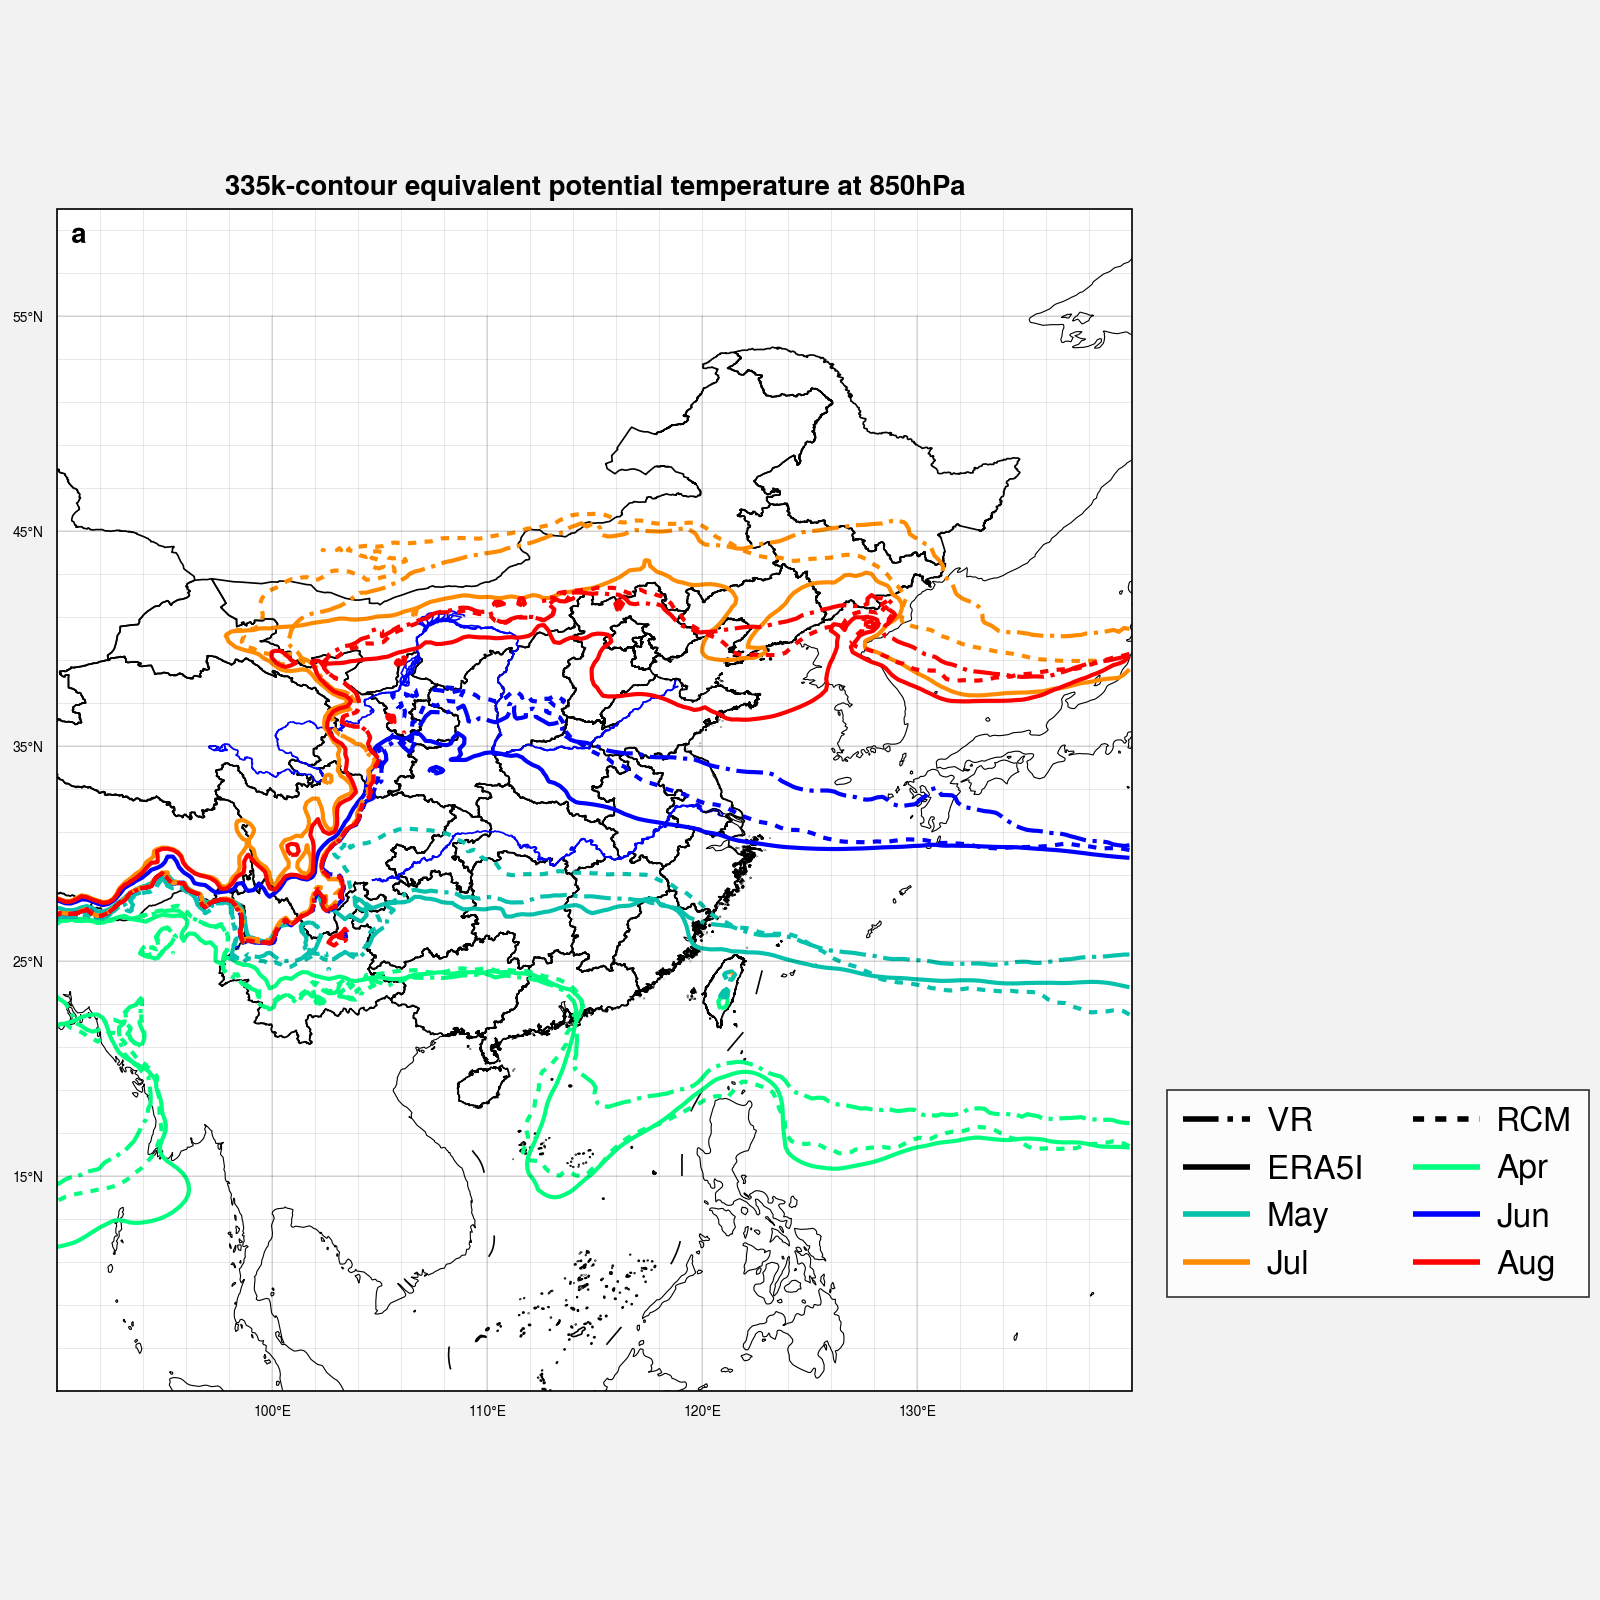

In [113]:
# import proplot as plot
from matplotlib import pyplot as plt
import proplot as plot
import cmaps
# ----- get filter vars coords-----

lon = ept_monthly['vr'].longitude
lat = ept_monthly['vr'].latitude

#----- create plot -----
fig, axs = plot.subplots(ncols=1 ,nrows=1, proj=('cyl'), figsize= (8,8))

##---- 直接绘图，从边界文件添加
turn_on_border = True
if(turn_on_border):
    # for ax_ind in axs:
    # for line in borders:
        # axs.plot(line[0::100], line[1::100], lw = 0.5, color='gray',transform=ccrs.Geodetic())
        # axs.plot(line[0::10], line[1::10], lw = 0.4, color='black',transform=ccrs.Geodetic())
    ##---- 使用shp文件添加
        ## shapefile数据下载的位置：
    ## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
    # world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
    river_border_shapefile =  "/raid52/yycheng/MPAS/REFERENCE/MODEL_CONSTANT/R1/" + "hyd1_4l.shp"
    southsea_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "southsea_island.shp"
    ninelines_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "nine_lines.shp"
    ## 来源： 沛沛的诸省 + 诸岛
    bou24p_shapefile     = "/m2data2/yycheng/data_stage/CN-border/peipeihelp/" + "bou2_4p.shp"
    ## 来源： https://www.resdc.cn/data.aspx?DATAID=200
    province_shapefile     = "/m2data2/yycheng/data_stage/CN-border/CN-sheng/" + "change_proj_CN-sheng-A.shp"

    for ax in axs:
        # world     = shpreader.Reader(world_border_shapefile).geometries()
        # river     = shpreader.Reader(river_border_shapefile).geometries()
        river     = shpreader.Reader(river_border_shapefile, encoding = 'gbk')
        # bou24p    = shpreader.Reader(bou24p_shapefile).geometries()
        ninelines = shpreader.Reader(ninelines_shapefile).geometries()
        province  = shpreader.Reader(province_shapefile).geometries()
        # ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.4, zorder=1)
        # ax.add_geometries(bou24p, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1) # 沛沛map
        ax.add_geometries(province, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1) # 地资所
        ax.add_geometries(ninelines, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.6, zorder=1)
        # ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.4, zorder=1)
        # 绘制部分的shapefile
        for region in river.records():
            if (region.attributes['NAME'] in ['黄河','长江']):
                # print("----- draw river! -----")
                # 此处需要使用 [] 让region.geometry可以迭代
                ax.add_geometries([region.geometry], ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.6, zorder=1)

m_contour_list = [] # 用于保存contour设置，后续设置colorbar使用
# color_seasons = ['springgreen','turquoise','blue','darkorange','red']
for season_index in range(0,5):
# for season_index in [3]:
        m_corr  = axs[0].contour(lon, lat, ept_monthly['era5i'][season_index,:,:].values,\
        levels=[335], color = color_seasons[season_index])

        m_corr  = axs[0].contour(lon, lat, ept_monthly['vr'][season_index,:,:].values, linestyles='dashdot',\
                levels=[335], color = color_seasons[season_index])

        m_corr  = axs[0].contour(lon, lat, ept_monthly['rcm'][season_index,:,:].values,\
                levels=[335], color = color_seasons[season_index])

        for c in m_corr.collections:
                c.set_dashes( [(0, (2.0, 2.0))]  )

# ----- format setting -----
axs.format(
abc=True,
abcloc = 'ul',
#----- 地图底图设置 -----
# reso = 'x-hi',
reso = 'med',
# coast = False,
coast = True,
coastlinewidth = 0.4,
borders = False,
lakes = False,
land  = False,
ocean = False,
# cartopyautoextent = True, 
# borderslinewidth=.5,
labels = True,
longrid  = True,
latgrid  = True,
#-----GEO axis-----
lonlim=(90, 140), latlim=(5, 60),
gridlabelsize = 5,
gridminor = True,
lonlocator = np.arange(90,142,10),
latlocator = np.arange(5,60+2,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(5,60+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="335k-contour equivalent potential temperature at 850hPa",
)

from matplotlib.lines import Line2D
custom_lines_ls = [Line2D([0], [0], color='k', lw=2,ls='dashdot',label='VR'),
                Line2D([0], [0], color='k', lw=2,ls=(0, (2.0, 2.0)),label='RCM'),
                Line2D([0], [0], color='k', lw=2,label='ERA5I')]

color_seasons = ['springgreen','turquoise','blue','darkorange','red']
seasons_names = ['Apr','May','Jun','Jul','Aug']
# custom_lines_co = []
for ind_number, icolor in enumerate( color_seasons ):
    custom_lines_ls.append( Line2D( [0],[0], color = icolor, lw=2, label = seasons_names[ind_number] ) )

fig.legend(handles = custom_lines_ls, bbox_to_anchor=(.25,0.25),prop={'size': 12}, ncol=2)
plt.savefig("./output_pic/equivalent_potential_temperature_850hPa_335K.png",dpi=600, facecolor = 'white')

#### 图例绘制尝试

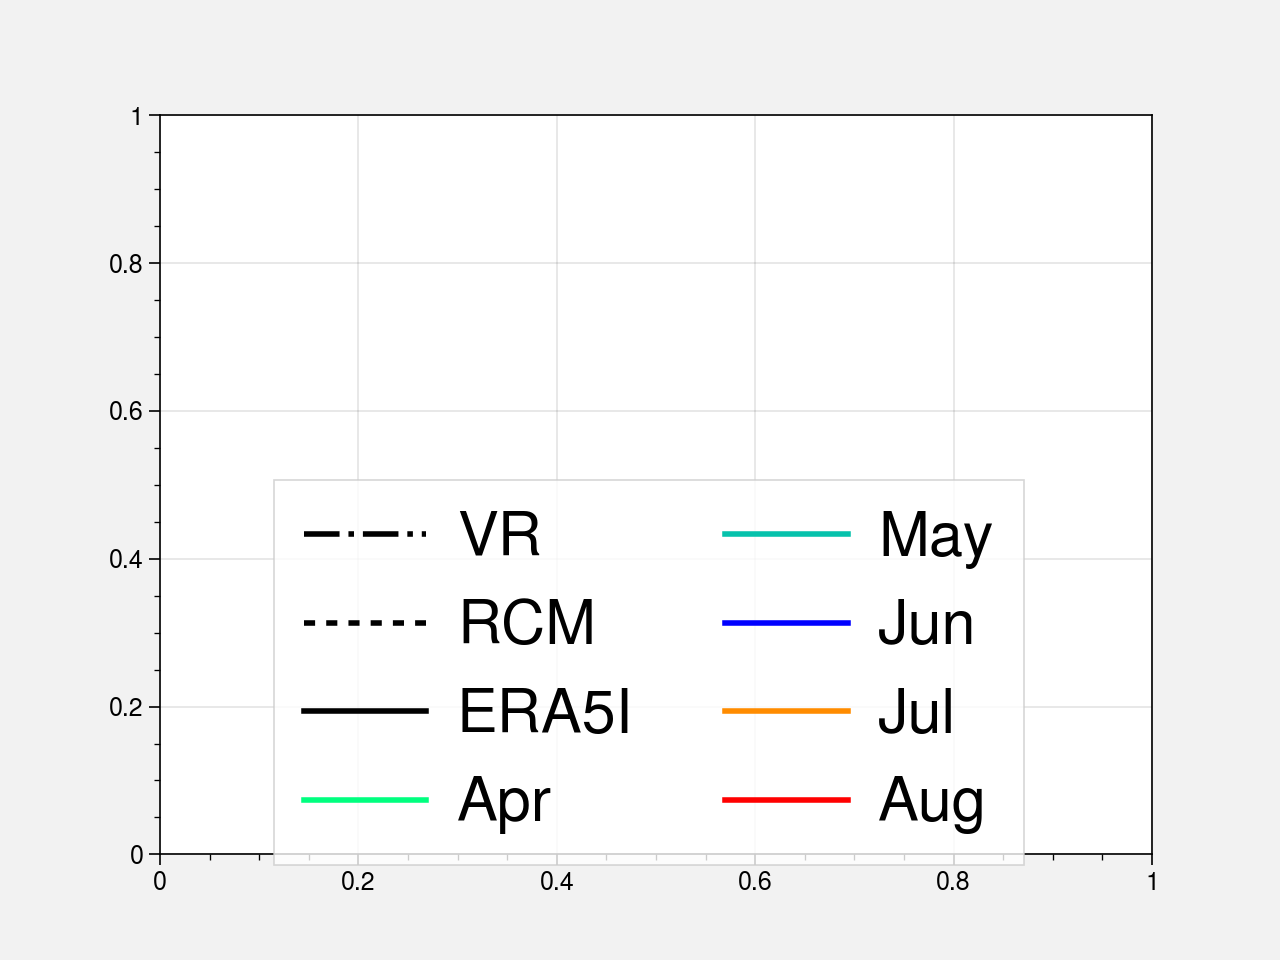

In [111]:
from matplotlib.lines import Line2D
custom_lines_ls = [Line2D([0], [0], color='k', lw=2,ls='dashdot',label='VR'),
                Line2D([0], [0], color='k', lw=2,ls=(0, (2.0, 2.0)),label='RCM'),
                Line2D([0], [0], color='k', lw=2,label='ERA5I')]

color_seasons = ['springgreen','turquoise','blue','darkorange','red']
seasons_names = ['Apr','May','Jun','Jul','Aug']
# custom_lines_co = []
for ind_number, icolor in enumerate( color_seasons ):
    custom_lines_ls.append( Line2D( [0],[0], color = icolor, lw=2, label = seasons_names[ind_number] ) )

fig, ax = plt.subplots()
# lines = ax.plot(data)
# fig.legend(custom_lines_ls, ['Cold', 'Medium', 'Hot','hothot'])
fig.legend(handles = custom_lines_ls, bbox_to_anchor=(0.8,0.5),prop={'size': 22}, ncol=2)